<a href="https://colab.research.google.com/github/AndreiTsvirko/DataScience/blob/main/HW2/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка данных

In [1]:
import pandas as pd
#Загрузка данных из csv
def load_car_data():
    try:
        df = pd.read_csv('data.csv')
        print(" Данные успешно загружены!")
        print(f"Размер данных: {df.shape}")
        print(f"Столбцы: {list(df.columns)}")
        return df
    except Exception as e:
        print(f" Ошибка загрузки: {e}")
        return None

#Класс для работы с пропущенными данными

In [2]:
import pandas as pd
import numpy as np
#Работа с пропущенными значениями
class MissingValuesHandler:
    def __init__(self, df):
        self.df = df
        self.missing_counts = None
  #Считаем пропущенные значения
    def count_missing(self):
        print(" Подсчет пропущенных значений.")
        self.missing_counts = self.df.isnull().sum()
        return self.missing_counts
  #Формирование отчета
    def show_report(self):
        if self.missing_counts is None:
            self.count_missing()
        print("\n Отчет о пропущенных значениях")
        print("-" * 35)

        total_missing = self.missing_counts.sum()
        print(f"Всего пропущено: {total_missing}")
        print("-" * 45)

        has_missing = False
        for col, count in self.missing_counts.items():
            if count > 0:
                print(f"{col}: {count} пропусков")
                has_missing = True

        if not has_missing:
            print(" Пропущенных нет.")
  #Заполняем пропущенные значения самым частым значением
    def fill_with_most_common(self):
        print("\n Заполняем пропуски.")

        df_filled = self.df.copy()
        filled_count = 0

        for col in df_filled.columns:
            missing_count = df_filled[col].isnull().sum()

            if missing_count > 0:
                # Для чисел используем медиану
                if df_filled[col].dtype in ['int64', 'float64']:
                    fill_value = df_filled[col].median()
                else:
                    # Для текста используем моду
                    mode_val = df_filled[col].mode()
                    fill_value = mode_val.iloc[0] if not mode_val.empty else 'Неизвестно'

                df_filled[col] = df_filled[col].fillna(fill_value)
                print(f"{col}: заполнено {missing_count} пропусков")
                filled_count += missing_count

        if filled_count == 0:
            print(" Пропущенных для заполнения не найдено")
        else:
            print(f" Всего заполнено {filled_count} пропущенных")

        return df_filled

#Проверка данных

In [4]:
import pandas as pd
from m_val import MissingValuesHandler
#Проверка данных
def check_data(df):
    print(" Проверка данных:")
    print(f"Размер: {df.shape[0]} строк, {df.shape[1]} столбцов")

    # Используем класс для проверки пропусков
    handler = MissingValuesHandler(df)
    handler.show_report()

    # Проверяем дубликаты
    duplicates = df.duplicated().sum()
    print(f"Дубликаты: {duplicates}")

    return df
#Очистка данных
def clean_data(df):
    print("\n Очистка данных:")

    # Удаляем дубликаты
    old_size = len(df)
    df_clean = df.drop_duplicates()
    new_size = len(df_clean)
    print(f"Удалили дубликатов: {old_size - new_size}")

    # Заполняем пропуски с помощью класса
    handler = MissingValuesHandler(df_clean)
    df_clean = handler.fill_with_most_common()

    print(f"Новое количество данных: {df_clean.shape}")
    return df_clean
#Описание данных
def show_info(df):
    print("\n Инфориация о данных:")

    if 'Make' in df.columns:
        print(f"Марок машин: {df['Make'].nunique()}")

    if 'Year' in df.columns:
        print(f"Годы: от {df['Year'].min()} до {df['Year'].max()}")

    if 'MSRP' in df.columns:
        print(f"Цены: от ${df['MSRP'].min():,} до ${df['MSRP'].max():,}")

#Визуализация данных

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Создание клааса визуализации данных авто
class CarVisualizer:

    def __init__(self, df):
        self.df = df
        self.created_plots = []
#Топ автомобильных марок
    def plot_top_brands(self, n=10):

        if 'Make' in self.df.columns:
            top_brands = self.df['Make'].value_counts().head(n)

            plt.figure(figsize=(14, 7))
            bars = plt.bar(range(len(top_brands)), top_brands.values,
                          color='lightgreen', alpha=0.7, edgecolor='black')

            plt.title(f'Топ {n} марок автомобилей', fontsize=14, fontweight='bold')
            plt.xlabel('Марка', fontsize=12)
            plt.ylabel('Количество автомобилей', fontsize=12)

            # Подписываем значения на столбцах
            for i, (brand, count) in enumerate(top_brands.items()):
                plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

            plt.xticks(range(len(top_brands)), top_brands.index, rotation=45, ha='right')
            plt.grid(axis='y', alpha=0.3)
            plt.tight_layout()
            plt.show()

            self.created_plots.append('Топ марок')
            print(" -= Создан график топ марок =-")
#График зависимости цены от года
    def plot_year_price(self):

        if 'Year' in self.df.columns and 'MSRP' in self.df.columns:
            plt.figure(figsize=(14, 8))

            # Фильтруем выбросы для лучшего отображения
            filtered_df = self.df[(self.df['MSRP'] > 0) & (self.df['MSRP'] < self.df['MSRP'].quantile(0.95))]

            scatter = plt.scatter(filtered_df['Year'], filtered_df['MSRP'],
                                alpha=0.6, color='purple', s=50, edgecolor='black', linewidth=0.5)

            plt.title('Зависимость цены от года выпуска', fontsize=14, fontweight='bold')
            plt.xlabel('Год выпуска', fontsize=12)
            plt.ylabel('Цена ($)', fontsize=12)

            # Форматируем оси
            plt.gca().ticklabel_format(style='plain', axis='y')
            plt.grid(alpha=0.3)
            plt.gca().set_axisbelow(True)
            plt.tight_layout()
            plt.show()

            self.created_plots.append('Цена от года')
            print("-= Создан график цена от годо =-")
#Список сформированных графиков
    def show_plots_list(self):

        if self.created_plots:
            print("\n  Созданные Графики:")
            for i, plot in enumerate(self.created_plots, 1):
                print(f"{i}. {plot}")
        else:
            print(" Графики еще не созданы")

#Машинное обучение и метрики

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
#Класс обучени модели предсказания цен автомобилей
class ModelTrainer:

    def __init__(self, df):
        self.df = df
        self.models = {}
        self.metrics = {}
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None
#Подготовка данных для обучения
    def prepare_data(self, target_column='MSRP'):
        print(" Подготовка данных для обучения.")

        # Создаем копию данных
        data = self.df.copy()

        # Удаляем пропуски в целевой переменной
        data = data.dropna(subset=[target_column])

        # Выбираем признаки и целевую переменную
        X = data.drop(columns=[target_column])
        y = data[target_column]

        # Кодируем категориальные переменные
        categorical_cols = X.select_dtypes(include=['object']).columns
        label_encoders = {}

        for col in categorical_cols:
            le = LabelEncoder()
            X = X.copy()
            X[col] = le.fit_transform(X[col].astype(str))
            label_encoders[col] = le

        # Заполняем пропуски в числовых признаках
        numeric_cols = X.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if X[col].isnull().sum() > 0:
                fill_value = X[col].median()
                X[col] = X[col].fillna(fill_value)

        # Масштабируем признаки
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Разделяем на train/test
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42
        )

        print(f" !!! Данные подготовлены: {self.X_train.shape[0]} train, {self.X_test.shape[0]} test samples")
#Обучение нескольких моделей
    def train_models(self):
        print("\n Обучение моделей.")

        # 1. Линейная регрессия
        print("1. Обучаем Linear Regression.")
        lr_model = LinearRegression()
        lr_model.fit(self.X_train, self.y_train)
        self.models['LinearRegression'] = lr_model

        # 2. Ridge регрессия
        print("2. Обучаем Ridge Regression.")
        ridge_model = Ridge(alpha=1.0)
        ridge_model.fit(self.X_train, self.y_train)
        self.models['Ridge'] = ridge_model

        # 3. Random Forest
        print("3. Обучаем Random Forest.")
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
        rf_model.fit(self.X_train, self.y_train)
        self.models['RandomForest'] = rf_model

        print(" Все модели обучены успешно.")
#Оценка моделей с различными метриками
    def evaluate_models(self):
        print("\n Оценка моделей:")
        print("-" * 60)

        for model_name, model in self.models.items():
            # Предсказания
            y_pred = model.predict(self.X_test)

            # Вычисляем метрики
            mae = mean_absolute_error(self.y_test, y_pred)
            mse = mean_squared_error(self.y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(self.y_test, y_pred)

            # Сохраняем метрики
            self.metrics[model_name] = {
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R2': r2
            }

            # Выводим результаты
            print(f"\n{model_name}:")
            print(f"  MAE: ${mae:,.2f}")
            print(f"  RMSE: ${rmse:,.2f}")
            print(f"  R²: {r2:.4f}")
 #Визуализация
    def plot_predictions(self):
        print("\n Визуализация предсказаний.")

        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        models_list = list(self.models.keys())

        for i, model_name in enumerate(models_list):
            y_pred = self.models[model_name].predict(self.X_test)

            axes[i].scatter(self.y_test, y_pred, alpha=0.6, color='blue')
            axes[i].plot([self.y_test.min(), self.y_test.max()],
                        [self.y_test.min(), self.y_test.max()], 'r--', lw=2)

            axes[i].set_xlabel('Реальные значения ($)')
            axes[i].set_ylabel('Предсказанные значения ($)')
            axes[i].set_title(f'{model_name}\nR² = {self.metrics[model_name]["R2"]:.3f}')
            axes[i].grid(alpha=0.3)

        plt.tight_layout()
        plt.show()
#Возвратим лучшую модель по R² score (коэффициенту детерминации)
    def get_best_model(self):
        best_model_name = max(self.metrics.items(), key=lambda x: x[1]['R2'])[0]
        best_model = self.models[best_model_name]
        best_metrics = self.metrics[best_model_name]

        print(f"\n !!! Лучшая модель: {best_model_name}")
        # коэффициент детерминации - оценка
        # качества насколько точно
        print(f"   R²: {best_metrics['R2']:.4f}")
        # В среднем насколько ошибается модель -
        # средняя абсолютная ошибка не
        # показывает большие ошибки явно, не
        # чуствительна к выбросам
        print(f"   MAE: ${best_metrics['MAE']:,.2f}")
        # Корень из средней квадратичной ошибки
        # - насколько в среднем ошибается модель
        # - чувствительна к большим выбросам
        print(f"   RMSE: ${best_metrics['RMSE']:,.2f}")

        return best_model_name, best_model, best_metrics
# Функция для обучения и оценки моделей
def train_and_evaluate(df):
    print(" Обучение моделей предсказания цен завершено")
    print("-" * 50)

    trainer = ModelTrainer(df)
    trainer.prepare_data()
    trainer.train_models()
    trainer.evaluate_models()
    trainer.plot_predictions()
    trainer.get_best_model()

    return trainer

#Исполняемый модуль

🚗 ПОЛНЫЙ АНАЛИЗ ДАННЫХ АВТОМОБИЛЕЙ

1. ЗАГРУЗКА ДАННЫХ...
 Данные успешно загружены!
Размер данных: (11914, 16)
Столбцы: ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

2. ПРОВЕРКА ДАННЫХ...
🔍 ПРОВЕРКА ДАННЫХ:
Размер: 11914 строк, 16 столбцов
 Подсчет пропущенных значений.

 Отчет о пропущенных значениях
-----------------------------------
Всего пропущено: 3850
---------------------------------------------
Engine Fuel Type: 3 пропусков
Engine HP: 69 пропусков
Engine Cylinders: 30 пропусков
Number of Doors: 6 пропусков
Market Category: 3742 пропусков
Дубликаты: 715

3. ОЧИСТКА ДАННЫХ...

🧹 ОЧИСТКА ДАННЫХ:
Удалили дубликатов: 715

 Заполняем пропуски.
Engine Fuel Type: заполнено 3 пропусков
Engine HP: заполнено 69 пропусков
Engine Cylinders: заполнено 30 пропусков
Number of Doors: заполнено 6 пропуско

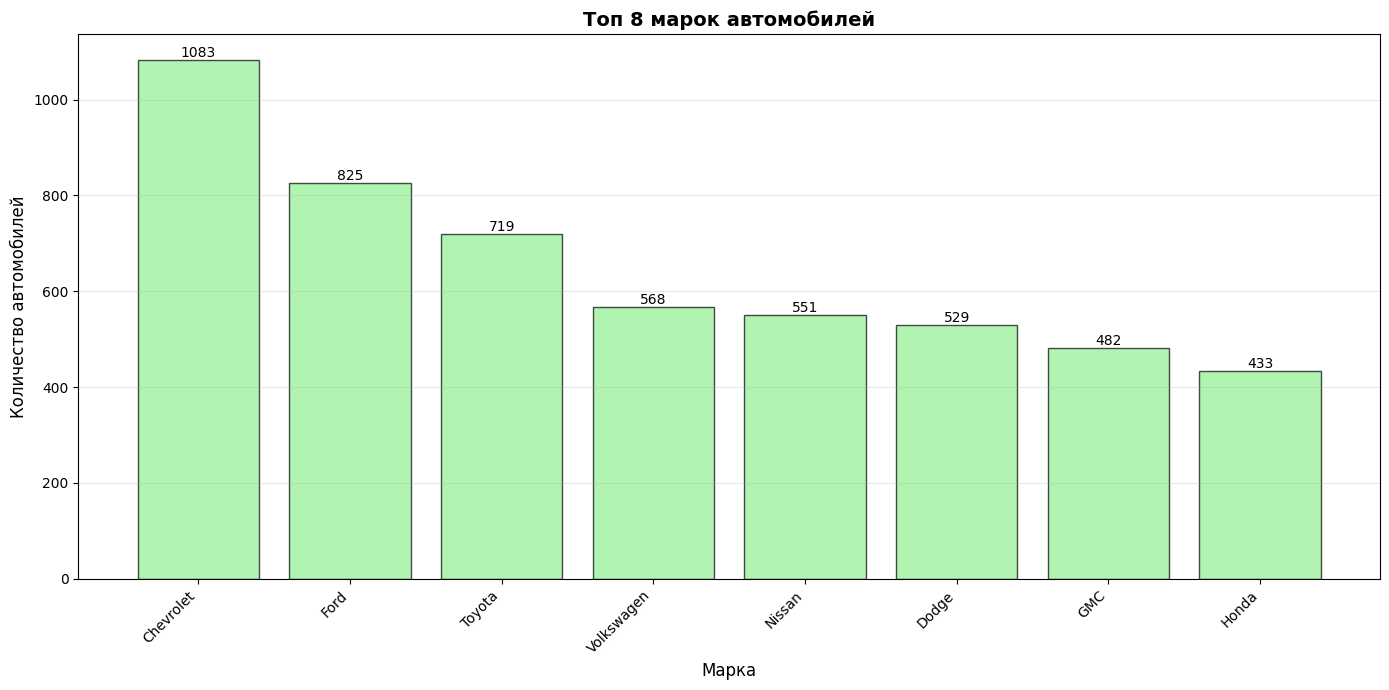

✅ Создан график топ марок


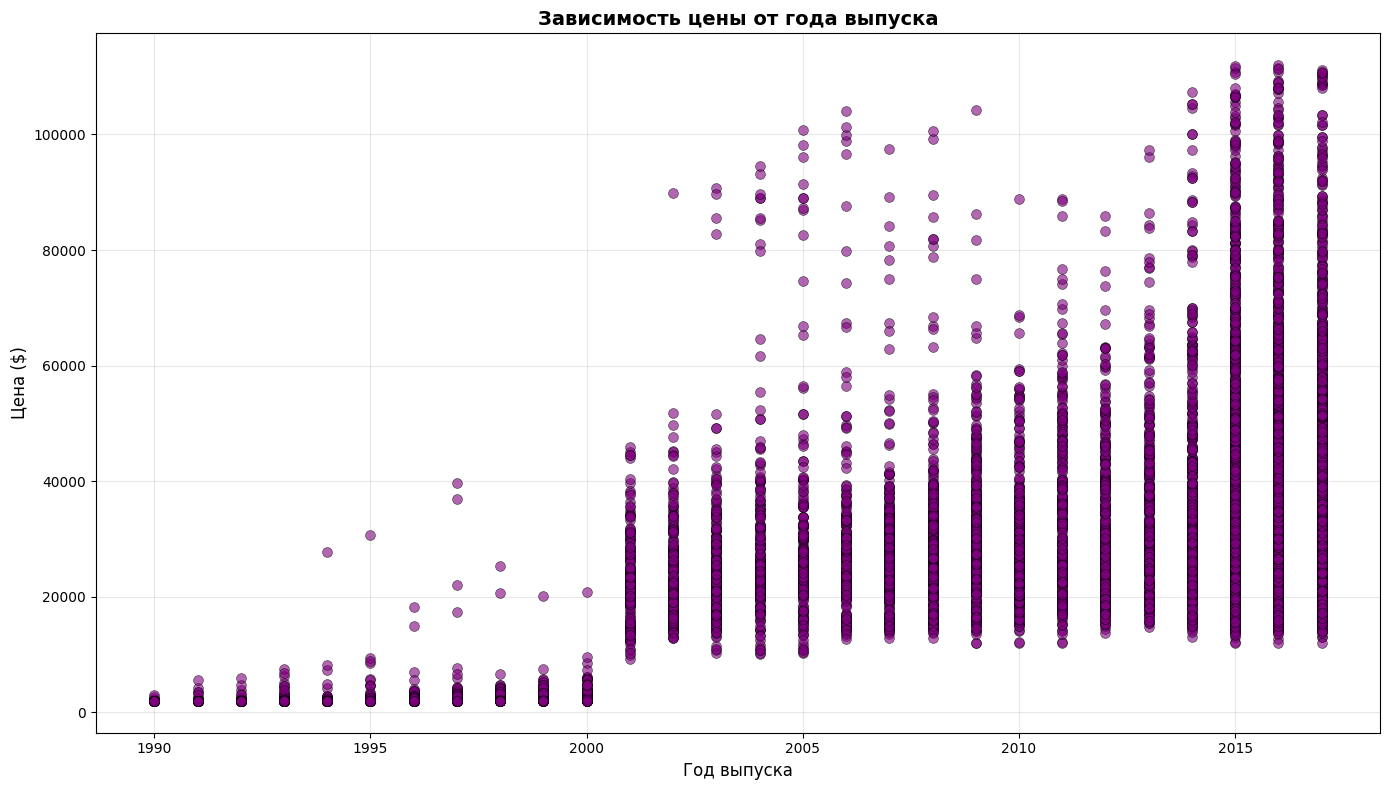

✅ Создан график цена от года

📈 СОЗДАННЫЕ ГРАФИКИ:
1. Топ марок
2. Цена от года

6. МАШИННОЕ ОБУЧЕНИЕ И МЕТРИКИ...
🚗 ОБУЧЕНИЕ МОДЕЛЕЙ ПРЕДСКАЗАНИЯ ЦЕН
🔄 Подготовка данных для обучения...
✅ Данные подготовлены: 8959 train, 2240 test samples

🎯 Обучение моделей...
1. Обучаем Linear Regression...
2. Обучаем Ridge Regression...
3. Обучаем Random Forest...
✅ Все модели обучены!

📊 Оценка моделей:

LinearRegression:
  MAE: $20,809.94
  RMSE: $52,762.67
  R²: 0.4254

Ridge:
  MAE: $20,808.55
  RMSE: $52,763.28
  R²: 0.4254

RandomForest:
  MAE: $4,534.54
  RMSE: $20,657.50
  R²: 0.9119

📈 Визуализация предсказаний...


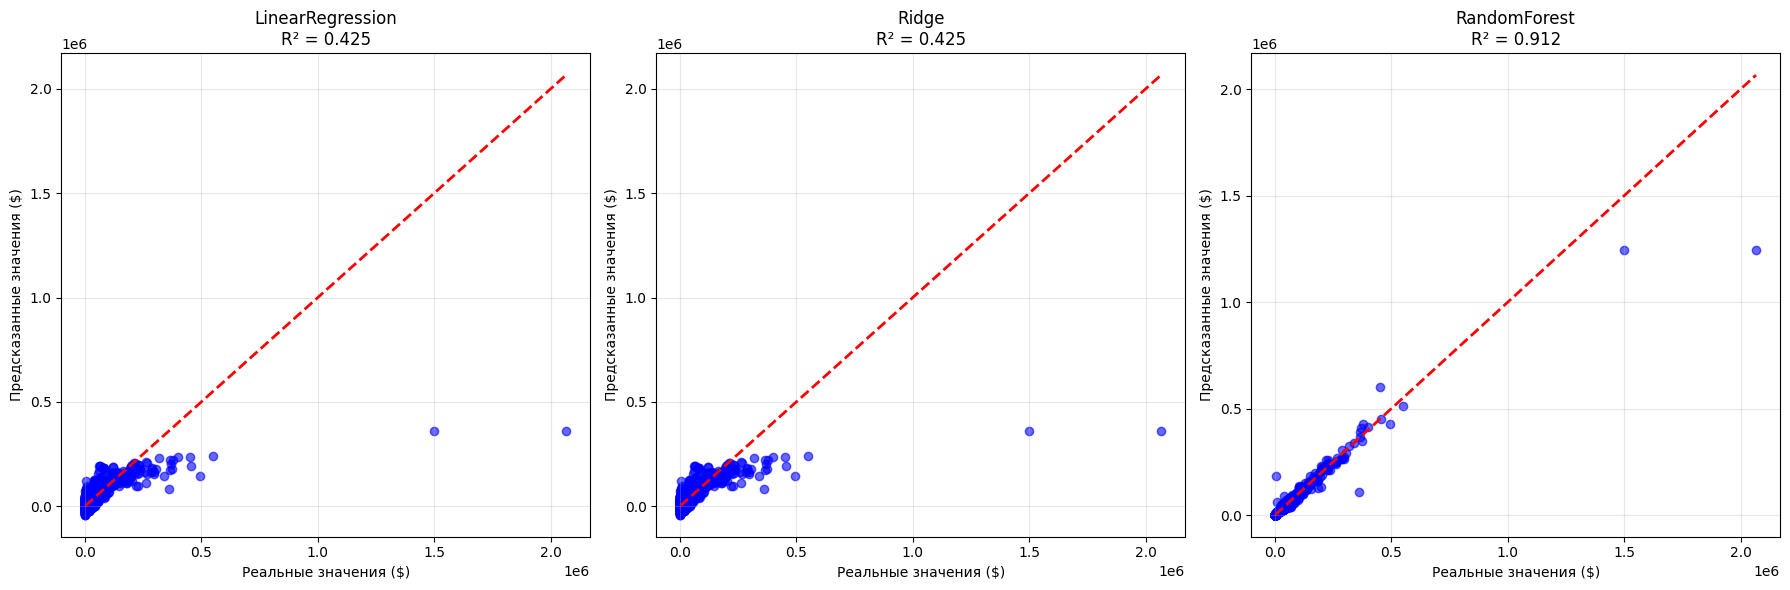


🏆 Лучшая модель: RandomForest
   R²: 0.9119
   MAE: $4,534.54
   RMSE: $20,657.50

🎉 ПОЛНЫЙ АНАЛИЗ ЗАВЕРШЕН!


In [ ]:
from data_loader import load_car_data
from data_processing import check_data, clean_data, show_info
from data_visualizer import CarVisualizer
from model_trainer import train_and_evaluate

def main():
    print("🚗 ПОЛНЫЙ АНАЛИЗ ДАННЫХ АВТОМОБИЛЕЙ")
    print("=" * 60)

    # 1. Загрузка данных
    print("\n1. ЗАГРУЗКА ДАННЫХ...")
    df = load_car_data()

    if df is None:
        return

    # 2. Проверка данных
    print("\n2. ПРОВЕРКА ДАННЫХ...")
    check_data(df)

    # 3. Очистка данных
    print("\n3. ОЧИСТКА ДАННЫХ...")
    df_clean = clean_data(df)

    # 4. Информация о данных
    print("\n4. ИНФОРМАЦИЯ О ДАННЫХ...")
    show_info(df_clean)

    # 5. Визуализация
    print("\n5. ВИЗУАЛИЗАЦИЯ...")
    viz = CarVisualizer(df_clean)
    viz.plot_top_brands(8)
    viz.plot_year_price()
    viz.show_plots_list()

    # 6. Обучение моделей и метрики
    print("\n6. МАШИННОЕ ОБУЧЕНИЕ И МЕТРИКИ...")
    trainer = train_and_evaluate(df_clean)

    print("\n🎉 ПОЛНЫЙ АНАЛИЗ ЗАВЕРШЕН!")

if __name__ == "__main__":
    main()